In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
data=pd.read_csv('housing.csv')

In [3]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Here the median house value is our target value. We want to predict this value using the other values.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


<Axes: >

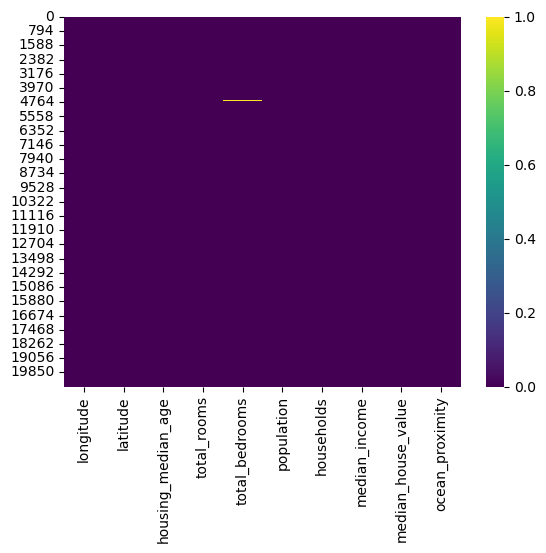

In [7]:
sns.heatmap(data.isnull(),cmap='viridis')

In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
Y=data['median_house_value']

In [11]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [12]:
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13664,-117.31,34.03,9.0,1199.0,187.0,629.0,207.0,5.7393,INLAND
17410,-120.57,34.96,38.0,1145.0,297.0,1107.0,296.0,2.1776,NEAR OCEAN
10021,-121.25,39.17,9.0,999.0,189.0,411.0,176.0,2.1250,INLAND
17498,-119.79,34.44,25.0,1479.0,314.0,977.0,309.0,4.1797,NEAR OCEAN
19350,-122.94,38.57,33.0,1530.0,266.0,728.0,250.0,5.1005,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11158,-118.00,33.82,21.0,2253.0,580.0,1536.0,500.0,3.2326,<1H OCEAN
10105,-117.95,33.92,18.0,2825.0,660.0,1590.0,643.0,3.6106,<1H OCEAN
8576,-118.42,33.90,43.0,1394.0,321.0,552.0,296.0,5.9596,<1H OCEAN
16675,-120.70,35.14,17.0,5805.0,1097.0,1919.0,932.0,3.5352,NEAR OCEAN


In [15]:
train_data=x_train.join(y_train)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13664,-117.31,34.03,9.0,1199.0,187.0,629.0,207.0,5.7393,INLAND,151600.0
17410,-120.57,34.96,38.0,1145.0,297.0,1107.0,296.0,2.1776,NEAR OCEAN,89100.0
10021,-121.25,39.17,9.0,999.0,189.0,411.0,176.0,2.1250,INLAND,151800.0
17498,-119.79,34.44,25.0,1479.0,314.0,977.0,309.0,4.1797,NEAR OCEAN,271800.0
19350,-122.94,38.57,33.0,1530.0,266.0,728.0,250.0,5.1005,<1H OCEAN,266700.0
...,...,...,...,...,...,...,...,...,...,...
11158,-118.00,33.82,21.0,2253.0,580.0,1536.0,500.0,3.2326,<1H OCEAN,204700.0
10105,-117.95,33.92,18.0,2825.0,660.0,1590.0,643.0,3.6106,<1H OCEAN,153600.0
8576,-118.42,33.90,43.0,1394.0,321.0,552.0,296.0,5.9596,<1H OCEAN,500001.0
16675,-120.70,35.14,17.0,5805.0,1097.0,1919.0,932.0,3.5352,NEAR OCEAN,357800.0


In [ ]:
sns.histplot(train_data)

In [ ]:
sns.pairplot(data=train_data,hue='ocean_proximity')

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
sns.heatmap(train_data.select_dtypes(include=['float64','int64']).corr(),annot=True)

In [ ]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data.ocean_proximity.value_counts()

In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

In [ ]:
train_data

<Axes: >

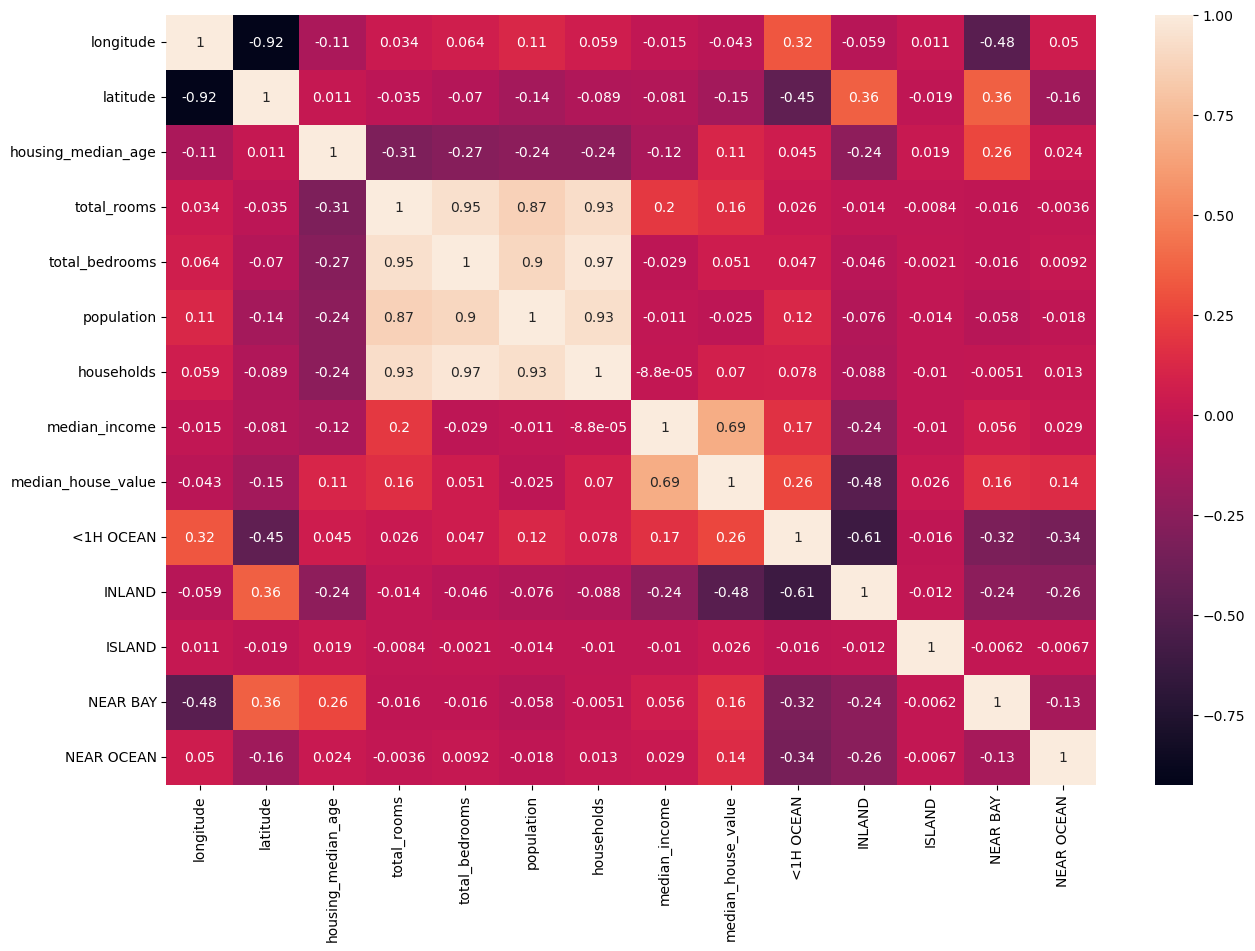

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

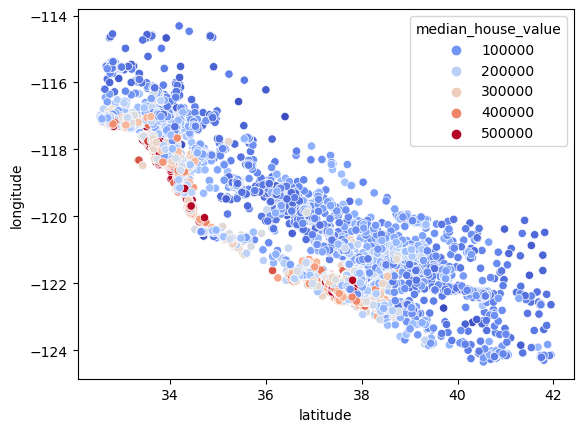

In [40]:
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [58]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']


<Axes: >

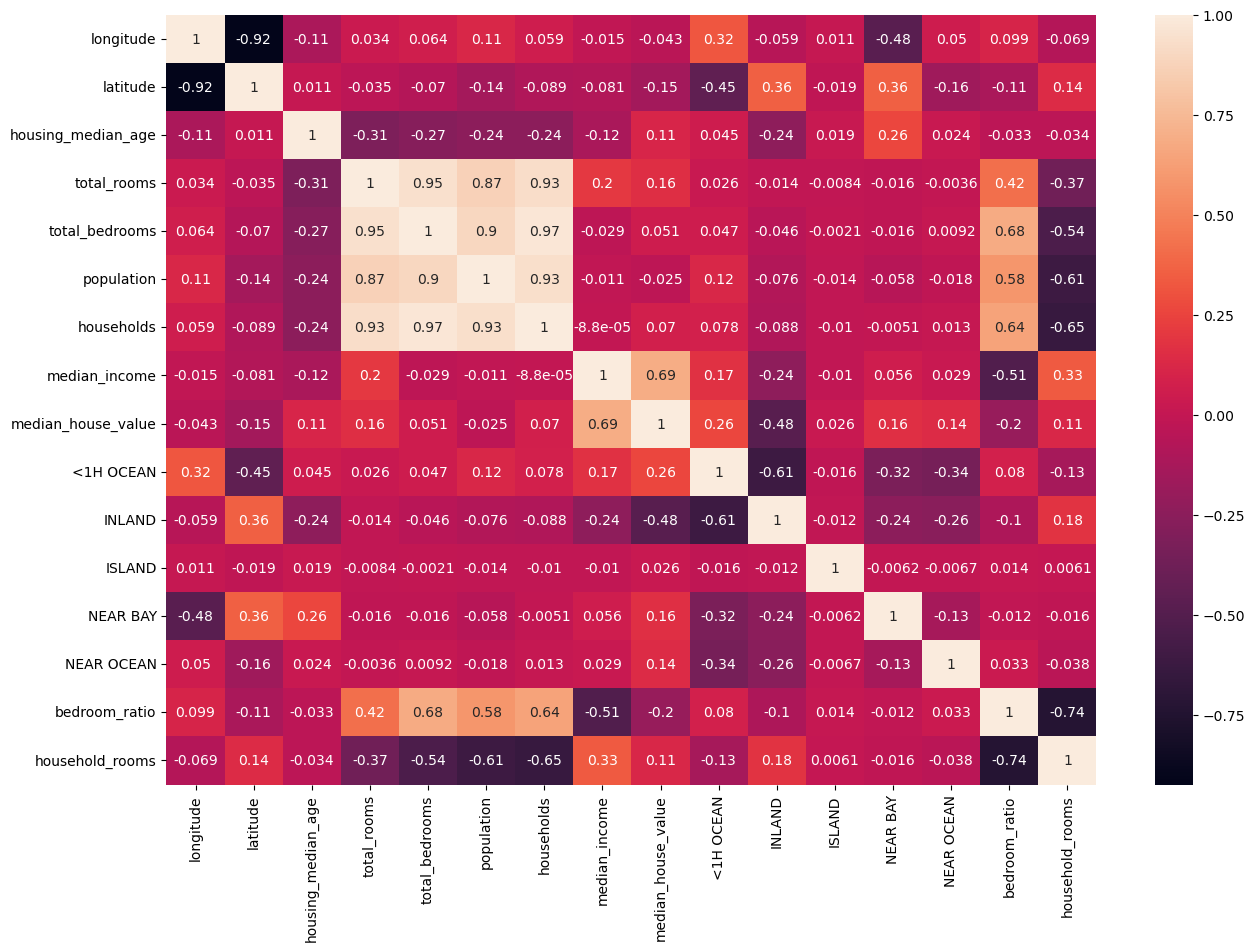

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True)

In [59]:
from sklearn.linear_model import LinearRegression


x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [60]:
test_data=x_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [61]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11198,-117.91,33.84,26.0,7.053586,5.976351,7.539559,5.993961,2.2716,350000.0,1,0,0,0,0,0.847278,1.176782
9190,-118.35,34.32,52.0,4.634729,3.401197,4.007333,3.496508,1.9875,191700.0,1,0,0,0,0,0.733850,1.325531
5037,-118.35,33.99,47.0,7.688913,5.942799,6.833032,5.918894,4.9531,180100.0,1,0,0,0,0,0.772905,1.299046
17297,-119.52,34.41,20.0,8.409608,6.685861,7.961370,6.641182,4.8060,279700.0,1,0,0,0,0,0.795026,1.266282
13860,-117.26,34.48,6.0,8.440960,6.625392,7.524021,6.543912,4.1933,163100.0,0,1,0,0,0,0.784910,1.289895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11860,-121.23,40.01,38.0,6.587550,5.252273,5.393628,4.753590,1.6250,75000.0,0,1,0,0,0,0.797303,1.385805
13910,-116.38,34.10,6.0,7.652071,5.855072,6.735780,5.771441,4.1458,116300.0,0,1,0,0,0,0.765162,1.325851
10111,-117.94,33.94,25.0,8.086718,6.304449,7.281386,6.218600,5.1084,303800.0,1,0,0,0,0,0.779605,1.300408
12416,-116.22,33.73,38.0,7.436028,5.866468,7.154615,5.723585,2.1217,68500.0,0,1,0,0,0,0.788925,1.299191


In [62]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18318,-122.11,37.44,35.0,7.609367,5.857933,6.931472,5.932245,5.6413,376600.0,0,0,0,1,0,0.769832,1.282713
8584,-118.40,33.89,31.0,7.981733,6.200509,7.047517,6.167516,7.9611,500001.0,1,0,0,0,0,0.776837,1.294157
9317,-122.49,37.99,27.0,8.607217,6.628041,7.558517,6.639876,6.9940,420800.0,0,0,0,1,0,0.770056,1.296292
3775,-118.41,34.16,14.0,6.359574,5.017280,5.921578,4.875197,4.1875,275000.0,1,0,0,0,0,0.788933,1.304475
2887,-118.99,35.39,39.0,7.709308,6.297109,7.324490,6.077642,1.6009,48800.0,0,1,0,0,0,0.816819,1.268470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6797,-118.14,34.08,24.0,8.006368,6.668228,7.985484,6.680855,2.9405,217800.0,1,0,0,0,0,0.832866,1.198405
4921,-118.25,34.00,32.0,7.105786,5.837730,7.164720,5.720312,1.5781,102900.0,1,0,0,0,0,0.821546,1.242203
3812,-118.48,34.21,25.0,7.965546,6.584791,7.639161,6.476972,3.3864,197400.0,1,0,0,0,0,0.826659,1.229825
15380,-117.34,33.46,14.0,7.551187,5.826000,6.744059,5.720312,5.5395,273300.0,1,0,0,0,0,0.771534,1.320066


In [63]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [64]:
reg.score(x_test,y_test)

0.6691815062773022

In [65]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(x_train,y_train)


RandomForestRegressor()

In [66]:
forest.score(x_test,y_test)

0.8097999251160058

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[30,50,100],
    "max_features":[8,12,24],
}
grid_search=GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 24],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [72]:
best_forest=grid_search.best_estimator_

In [73]:
best_forest.score(x_test,y_test)

0.8125640450712854

In [74]:
best_forest

RandomForestRegressor(max_features=12)